## Encoding Categorical Data
- Encoding categorical data is crucial for preparing data for machine learning algorithms, as most models work better with numerical data. 

## Types
- Nominal Data (One-hot-encoding)
- Ordinal data (ordinal encoding)
- Label Encoding (similiar to ordinal)

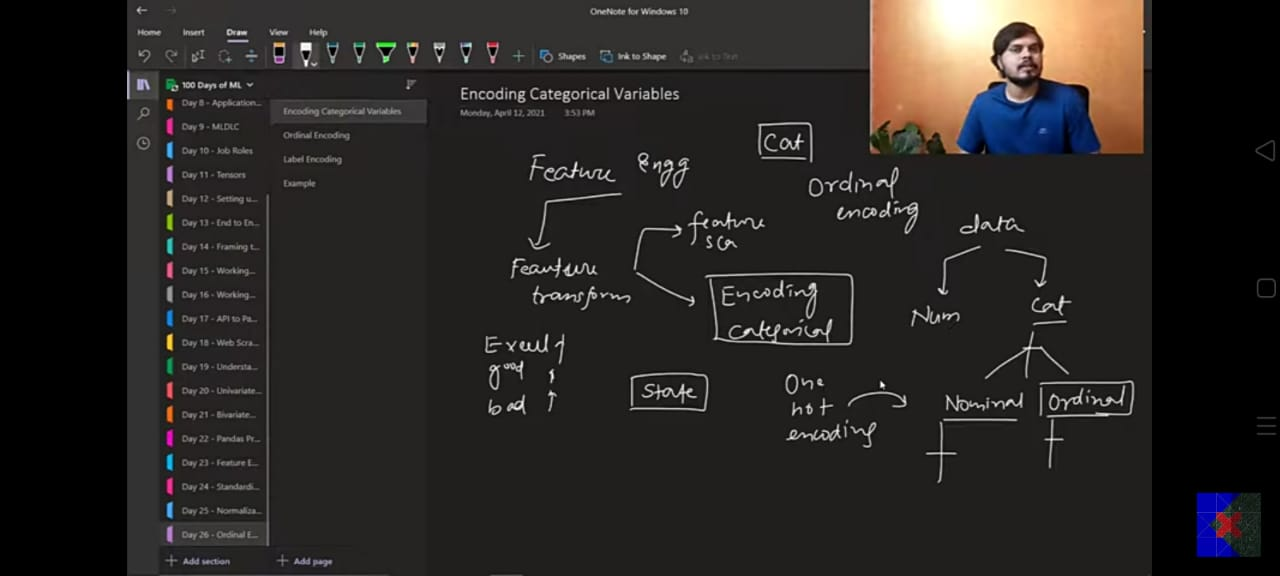

In [65]:
from IPython.display import Image, display

# For local file
display(Image(filename=r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\WhatsApp Image 2024-10-26 at 07.47.53.jpeg"))

# For URL
# display(Image(url='https://example.com/image.jpg'))

## 1. Label Encoding
- only in output features

## Ordinal Encoding
- Education Feature that values like HighSchool,Undergrad,PostGrad
- PG> UG >HS
- PG = 2, UG = 1, HS=1

In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\customer.csv")

In [68]:
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [69]:
df.sample(5)

,age,gender,review,education,purchased
9,74,Male,Good,UG,Yes
20,57,Female,Average,School,Yes
11,74,Male,Good,UG,Yes
42,30,Female,Good,PG,Yes
43,27,Male,Poor,PG,No


In [70]:
df.shape

(50, 5)

In [71]:
df.isnull().sum()

age          0
gender       0
review       0
education    0
purchased    0
dtype: int64

In [72]:
df.duplicated().sum()

1

In [73]:
df.drop_duplicates(inplace =True)

In [74]:
df.head(1)

,age,gender,review,education,purchased
0,30,Female,Average,School,No


- gender - Nominal
- review - ordinal
- education - ordinal
- purchased - label

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,2:4],df.iloc[:,-1],test_size=0.2)

In [77]:
X_train

,review,education
17,Poor,UG
7,Poor,School
33,Good,PG
4,Average,UG
21,Average,PG
22,Poor,PG
16,Poor,UG
40,Good,School
0,Average,School
41,Good,PG


In [78]:
X_test

,review,education
14,Poor,PG
49,Good,UG
20,Average,School
13,Average,School
18,Good,School
38,Good,School
48,Good,UG
24,Average,PG
37,Average,PG
30,Average,UG


In [79]:
y_test

14    Yes
49     No
20    Yes
13     No
18     No
38     No
48    Yes
24    Yes
37    Yes
30     No
Name: purchased, dtype: object

In [80]:
from sklearn.preprocessing import OrdinalEncoder

In [81]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [82]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [83]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [84]:
X_train

array([[0., 1.],
       [0., 0.],
       [2., 2.],
       [1., 1.],
       [1., 2.],
       [0., 2.],
       [0., 1.],
       [2., 0.],
       [1., 0.],
       [2., 2.],
       [1., 1.],
       [0., 2.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [2., 1.],
       [1., 0.],
       [2., 1.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [2., 0.],
       [2., 1.],
       [0., 2.],
       [2., 0.],
       [0., 0.],
       [0., 2.],
       [2., 2.],
       [0., 0.],
       [0., 2.],
       [1., 1.],
       [2., 2.],
       [0., 2.],
       [0., 1.],
       [2., 0.],
       [1., 1.]])

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()   ###Randomly decide kisko kya value milegi

In [87]:
le.fit(y_train)

LabelEncoder()

In [88]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [89]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [90]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [91]:
df.head(20)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No
5,31,Female,Average,School,Yes
6,18,Male,Good,School,No
7,60,Female,Poor,School,Yes
8,65,Female,Average,UG,No
9,74,Male,Good,UG,Yes
